In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)


In [7]:
df=pd.read_csv('malignant_comments.csv',sep="\t")
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
159616,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0.0,0.0,0.0,0.0,0.0,0.0
159617,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0.0,0.0,0.0,0.0,0.0,0.0
159618,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0.0,0.0,0.0,0.0,0.0,0.0
159619,fff125370e4aaaf3,And it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


EXPLORATORY DATA ANALYSIS

Analysing the dataset value counts using countplot

0.0    144239
1.0     15289
Name: malignant, dtype: int64


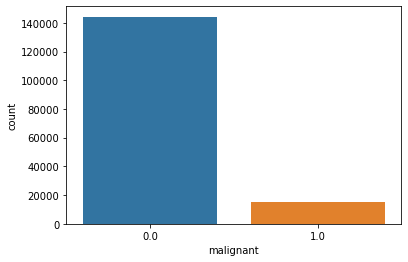

In [8]:
ax=sns.countplot('malignant',data=df)
print(df['malignant'].value_counts())

The target variable(malignant) is highly imbalanced with the 'NO'(0.0) class having 1,44,239(90% approx.) instances and the 'YES'(1.0) having only 15,289 instances.

0.0    157932
1.0      1596
Name: highly_malignant, dtype: int64


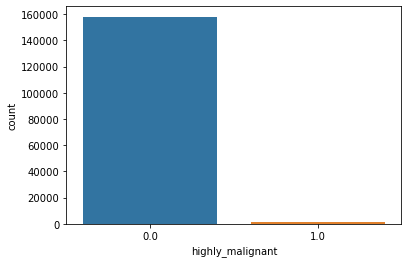

In [9]:
ax=sns.countplot('highly_malignant',data=df)
print(df['highly_malignant'].value_counts())

The 'highly_malignant' feature also has an imbalanced distribution with 0.0('NO') class constituting almost 99%(1,57,932) of the feature's data whereas 1.0('YES') category has only 1,596.

0.0    151084
1.0      8444
Name: rude, dtype: int64


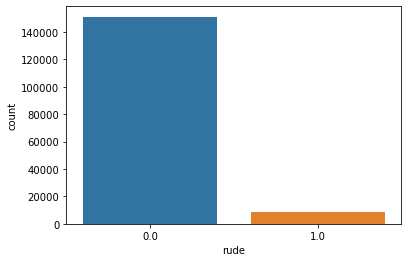

In [10]:
ax=sns.countplot('rude',data=df)
print(df['rude'].value_counts())

The rude feature is also imbalanced with 0.0('NO') category constituting 1,51,084(95% approx.) and "YES" category constituting 8,444(5% approx).

0.0    159050
1.0       478
Name: threat, dtype: int64


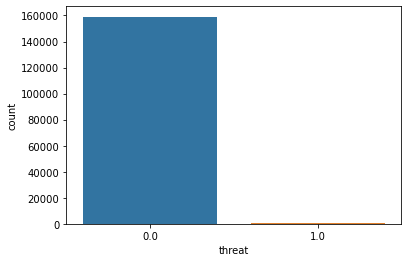

In [11]:
ax=sns.countplot('threat',data=df)
print(df['threat'].value_counts())

The threat feature was highly imbalanced with 0.0('NO') category constituting 1,59,050(99.5% approx.) of the data and 1.0('YES') having only 478 instances.

0.0    151653
1.0      7875
Name: abuse, dtype: int64


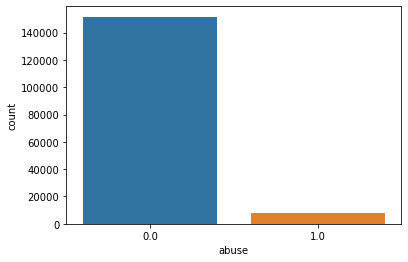

In [12]:
ax=sns.countplot('abuse',data=df)
print(df['abuse'].value_counts())

The abuse feature was also highly imbalanced with 0.0('NO') category constituting 1,51,653(95% approx.) and 1.0('YES') constituting 7875(5% approx) of the data.

0.0    158104
1.0      1405
Name: loathe, dtype: int64


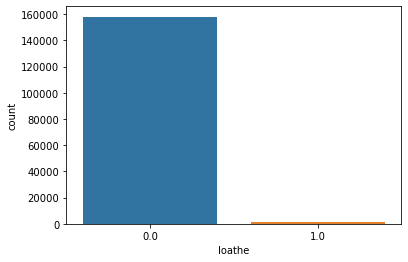

In [13]:
ax=sns.countplot('loathe',data=df)
print(df['loathe'].value_counts())

The loathe feature is highly imbalanced with 0.0('NO') category having 1,58,104(99% approx.) and 1.0('YES') has only 1,405 instances.

Checking for missing values

In [14]:
df.isnull().sum()

id                    0
comment_text         74
malignant            93
highly_malignant     93
rude                 93
threat               93
abuse                93
loathe              112
dtype: int64

Dropping the rows having missing values as the number of rows having them are negligible when compared to the dataset,hence not performing any replace operations as it may mislead the model.

In [15]:
df_new=df.dropna()
df_new.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [16]:
df_new.shape

(159509, 8)

Now comparing the independent features with the target features

<AxesSubplot:xlabel='highly_malignant', ylabel='malignant'>

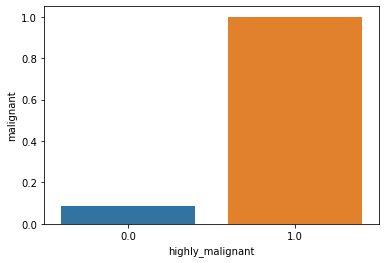

In [17]:
sns.barplot(x='highly_malignant',y='malignant',data=df_new)

In [18]:
#df_grp=['highly_malignant','malignant']
df_group=df_new.groupby('malignant')['highly_malignant'].count()
df_group

malignant
0.0    144220
1.0     15289
Name: highly_malignant, dtype: int64

In [19]:
count1=count2=count3=count4=0
for i in range(0,len(df)):
    if(df['malignant'][i]==1.0):
        if(df['malignant'][i]==1.0)and(df['highly_malignant'][i]==1.0):
            count1=count1+1
        elif(df['malignant'][i]==1.0)and(df['highly_malignant'][i]!=1.0):
            count2=count2+1
        elif(df['malignant'][i]!=1.0) and(df['highly_malignant'][i]==1.0):
            count3=count3+1
    else:
        count4=count4+1

In [20]:
print("highly_malignant aswell as  malignant",count1,count1/159621*100,'%')
print("just malignant",count2,count2/159621*100,'%')
print("highly malignant but not malignant",count3,count3/159621*100,'%')
print("other",count4,count4/159621*100,'%')

highly_malignant aswell as  malignant 1594 0.9986154703954994 %
just malignant 13695 8.57969816001654 %
highly malignant but not malignant 0 0.0 %
other 144332 90.42168636958796 %


In [21]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','highly_malignant'])
#print(LoanData.head())3
#################################################
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['highly_malignant'])
CrosstabResult
 


highly_malignant,0.0,1.0
malignant,,
0.0,144220,0
1.0,13695,1594


<AxesSubplot:xlabel='malignant'>

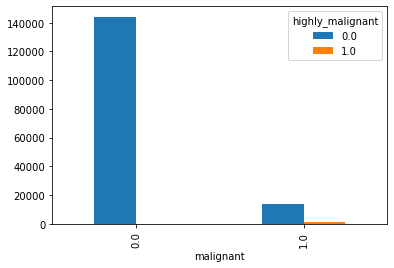

In [22]:
# Grouped bar chart between malignant and highly malignant
%matplotlib inline 
CrosstabResult.plot.bar()

OBSEVATION:
    1)Out of 15,289 malignant comments,1594 comments(10.4%) were highly malignant.
    2)All the comments that were not malignant were also not highly_malignant.
    3)13,695 comments out of 15,289 malignant(1.0) comments were not highly malignant.

MALIGNANT VS RUDE

In [23]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','rude'])
#print(LoanData.head())
#################################################
# Cross tabulation between Rude and malignant
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['rude'])
CrosstabResult
 


rude,0.0,1.0
malignant,,
0.0,143698,522
1.0,7367,7922


<AxesSubplot:xlabel='malignant'>

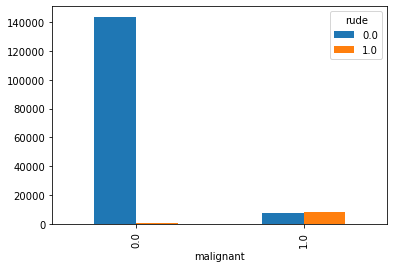

In [24]:
%matplotlib inline 
CrosstabResult.plot.bar()

OBSERVATIONS:
    1)7,922 comments were rude and malignant
    2)7637 comments were malignant but not rude
    3)522 comments were rude but not malignant
    4)1,43,698 comments were neither rude nor malignant.

MALIGNANT VS THREAT

In [25]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','threat'])
#print(LoanData.head())
#################################################
# Cross tabulation between threat and malignant
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['threat'])
CrosstabResult
 


threat,0.0,1.0
malignant,,
0.0,144191,29
1.0,14840,449


OBSERVATIONS:
    1)14,840 comments were malignant but not threatning.
    2)449 comments were malignant aswell as threatning.
    3)29 comments were threatning but not malignant.
    4)1,44,191 comments were neither malignant nor threatning.

MALIGNANT VS ABUSE

In [26]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','abuse'])
#print(LoanData.head())
#################################################
# Cross tabulation between abuse and malignant
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['abuse'])
CrosstabResult
 


abuse,0.0,1.0
malignant,,
0.0,143687,533
1.0,7947,7342


OBSERVATIONS:
    1)7,342 comments were malignant as well as abuse.
    2)7,947 comments were malignant but not abuse.
    3)533 comments were abuse but not malignant.
    4)1,43,687 comments were neither malignant nor abuse.

MALIGNANT VS LOATHE

In [27]:
#Create the Data Frame
LoanData=pd.DataFrame(data=df_new,columns=['malignant','loathe'])
#print(LoanData.head())
#################################################
# Cross tabulation between loathe and malignant
CrosstabResult=pd.crosstab(index=LoanData['malignant'],columns=LoanData['loathe'])
CrosstabResult
 


loathe,0.0,1.0
malignant,,
0.0,144117,103
1.0,13987,1302


OBSERVATIONS:
    1)1,302 comments were malignant and loathe
    2)13,987 comments were malignant but not loathe
    3)103 comments were loathe but not malignant
    4)1,44,117 comments were neither malignant nor loathe.

In [28]:
df_new['comment_text'].nunique()

159509

In [29]:
df_new['id'].nunique()

159509

In [30]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [31]:
df['comment_text'][10000]

'"I have changed ""Lance Thomas"" to ""Lance Thomas"" to link to \nAmerican Pro Basketball player mentioned in the Biography.\n\n"'

In [32]:
df['comment_text'][1204]

"Several NCAA Brackets Posted \n\nI did some work to address the issues you raised, and I've uploaded/linked in several sample tournament pages. See 1946 NCAA Men's Division I Basketball Tournament, which has an infobox at the bottom. I added one tourney page for each full decade of the NCAA Tournament. Barring any huge objections, I'd like to add the remaining 50+ pages tonight."

In [33]:
df_new['malignant'].value_counts(normalize=True)

0.0    0.90415
1.0    0.09585
Name: malignant, dtype: float64

In [34]:
#creating a subset of the dataframe by taking all the columns except id
df_sub=df_new.iloc[:,2:].sum()
df_sub

malignant           15289.0
highly_malignant     1594.0
rude                 8444.0
threat                478.0
abuse                7875.0
loathe               1405.0
dtype: float64

CLEANING THE TEXT DATA(removing stopwords,symbols,numbers etc) FOR PREPROCESSING

In [35]:
# Import relevant packages
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords  # Remove useless words
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; aggressive

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [36]:
df_new['comment_text']=df_new['comment_text'].astype(str)

In [37]:
alpha=lambda x:re.sub(r"\[[0-9]*\]",' ',x)

In [38]:
alpha2=lambda x:re.sub(r'\s+',' ',x)

In [39]:
alpha3=lambda x:x.lower()

In [40]:
alpha4=lambda x:re.sub(r'\d',' ',x)

In [41]:
alpha5=lambda x:re.sub(r'\s+'," ",x)

In [42]:
alpha6=lambda x:x.translate(str.maketrans("","",string.punctuation))

In [43]:
df_new['comment_text']=df_new['comment_text'].map(alpha).map(alpha2).map(alpha3).map(alpha4).map(alpha5).map(alpha6)

In [44]:
df_new['comment_text'][1000]

'rex mundi ive created a stub on rex mundi at rex mundi high school only thing i know about it is that both my aunt donna and bob griese went there please add anything you might know about it btw my dad was a panther i live in princeton myself'

In [45]:
df_new['comment_text'][1000]

'rex mundi ive created a stub on rex mundi at rex mundi high school only thing i know about it is that both my aunt donna and bob griese went there please add anything you might know about it btw my dad was a panther i live in princeton myself'

In [46]:
malig=['id','comment_text','malignant']

In [47]:
df_new[malig].columns

Index(['id', 'comment_text', 'malignant'], dtype='object')

In [48]:
x=df_new[malig].drop('malignant',axis=1)
y=df_new['malignant']

In [49]:
y.value_counts()

0.0    144220
1.0     15289
Name: malignant, dtype: int64

The target variable is largely imbalanced with less than 10% of its data in the malignant(1.0) category.
To resolve this a subset of the dataframe is taken which contained 50% of the rows in toxic category and another 50% in the non toxic category.

Since the comment_text data cannot be converted to continous using encoding,TFID Vectorizer is being used to assign a vector to each word in the text data,therefore keeping the meaning/context in play.

In [50]:
(df_new['malignant']==1).sum()

15289

In [51]:
bal1=df_new[df_new['malignant']==1]
bal1


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1.0,1.0,1.0,0.0,1.0,0.0
12,0005c987bdfc9d4b,hey what is it talk what is it an exclusive...,1.0,0.0,0.0,0.0,0.0,0.0
16,0007e25b2121310b,bye dont look come or think of comming back to...,1.0,0.0,0.0,0.0,0.0,0.0
42,001810bf8c45bf5f,you are gay or antisemmitian archangel white t...,1.0,0.0,1.0,0.0,1.0,1.0
43,00190820581d90ce,fuck your filthy mother in the ass dry,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
159544,fef4cf7ba0012866,our previous conversation you fucking shit ea...,1.0,0.0,1.0,0.0,1.0,1.0
159564,ff39a2895fc3b40e,you are a mischievious pubic hair,1.0,0.0,0.0,0.0,1.0,0.0
159591,ffa33d3122b599d6,your absurd edits your absurd edits on great w...,1.0,0.0,1.0,0.0,1.0,0.0
159596,ffb47123b2d82762,hey listen dont you ever delete my edits ever...,1.0,0.0,0.0,0.0,1.0,0.0


To balance the dataset for different target labels,samples of 0 and 1 categories were extracted from the original dataframe and merged into a new dataframe(unique for every target feature).

In [52]:
bal2=df_new[df_new['malignant']==0]
bal2


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation why the edits made under my userna...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
159616,ffe987279560d7ff,and for the second time of asking when your vi...,0.0,0.0,0.0,0.0,0.0,0.0
159617,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0.0,0.0,0.0,0.0,0.0,0.0
159618,ffee36eab5c267c9,spitzer umm theres no actual article for prost...,0.0,0.0,0.0,0.0,0.0,0.0
159619,fff125370e4aaaf3,and it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
balanced_mal=pd.concat([bal1,bal2[:15289]],axis=0)
balanced_mal['malignant'].value_counts()

0.0    15289
1.0    15289
Name: malignant, dtype: int64

In [57]:

from sklearn.model_selection import train_test_split, cross_val_score


# Import ML algos
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import MultinomialNB, BernoulliNB
#from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import AdaBoostClassifier

In [58]:
bal1=df_new[df_new['highly_malignant']==1]
bal2=df_new[df_new['highly_malignant']==0]
print(bal1.shape)
print(bal2.shape)


(1594, 8)
(157915, 8)


In [59]:
balanced_hmal=pd.concat([bal1,bal2[:3000]],axis=0)
balanced_hmal['highly_malignant'].value_counts()

0.0    3000
1.0    1594
Name: highly_malignant, dtype: int64

In [60]:
bal1=df_new[df_new['rude']==1]
bal2=df_new[df_new['rude']==0]
print(bal1.shape)
print(bal2.shape)

(8444, 8)
(151065, 8)


In [61]:
bal_rude=pd.concat([bal1,bal2[:10000]],axis=0)
bal_rude.shape

(18444, 8)

In [62]:
#Threat
bal1=df_new[df_new['threat']==1]
bal2=df_new[df_new['threat']==0]
print(bal1.shape)
print(bal2.shape)

(478, 8)
(159031, 8)


In [63]:
bal_threat=pd.concat([bal1,bal2[:1000]],axis=0)
bal_threat.shape

(1478, 8)

In [64]:
#abuse
bal1=df_new[df_new['abuse']==1]
bal2=df_new[df_new['abuse']==0]
print(bal1.shape)
print(bal2.shape)

(7875, 8)
(151634, 8)


In [65]:
bal_abuse=pd.concat([bal1,bal2[:15000]],axis=0)
bal_abuse.shape

(22875, 8)

In [66]:
#loathe
bal1=df_new[df_new['loathe']==1]
bal2=df_new[df_new['loathe']==0]
print(bal1.shape)
print(bal2.shape)

(1405, 8)
(158104, 8)


In [67]:
bal_loathe=pd.concat([bal1,bal2[:2800]],axis=0)
bal_loathe.shape

(4205, 8)

Since the problem statement focuses on identifying the malignant/abuse/threat/loathe/highly_malignant classes from the normal ones,f1 score was used as the primary metric for selecting our model.

ALGORITHMS like Adaboostclassifier,DecisionTreeClassifier,KNeighborsClassifier were also used apart from LogisticRegression,RandomForest and SVC.SVC was discarded because although it gave the best f1_score,it took forever to process the data.LinearSVC() also did a great job in classifying the 0 and 1 categories of the target columns but it could not be used for predicting the probability of the features as it does not have a predict.proba method. 

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [72]:
def get_f1(rfc,x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

    
    #rfc=RandomForestClassifier(criterion='entropy')
    # Initiating a Tfidf vectorizer
    tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    x_train_tfv=tfv.fit_transform(x_train)
    x_test_tfv=tfv.transform(x_test)
    #making predictions with the logistic regression model
    rfc.fit(x_train_tfv,y_train)
    pred_rfc=rfc.predict(x_test_tfv)
    #print("accuracy_score",accuracy_score(y_test,pred_rfc))
    #print(confusion_matrix(y_test,pred_rfc))
    print(classification_report(y_test,pred_rfc))

In [74]:
#Checking out the metrics for different targets
list_data=[balanced_mal,balanced_hmal,bal_rude,bal_threat,bal_abuse,bal_loathe]
columns=['malignant','highly_malignant','rude','threat','abuse','loathe']
rfc=RandomForestClassifier()
lr=LogisticRegression()
#svm=SVC(probability=True)
c=0
for i in list_data:
    y=i[columns[c]]
    x=i['comment_text']
    print(columns[c])
    get_f1(rfc,x,y)
    get_f1(lr,x,y)
   # get_f1(svm,x,y)
    c=c+1
    

malignant
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      5025
         1.0       0.91      0.80      0.85      5066

    accuracy                           0.86     10091
   macro avg       0.87      0.86      0.86     10091
weighted avg       0.87      0.86      0.86     10091

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      5025
         1.0       0.91      0.85      0.88      5066

    accuracy                           0.88     10091
   macro avg       0.89      0.88      0.88     10091
weighted avg       0.89      0.88      0.88     10091

highly_malignant
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       958
         1.0       0.93      0.90      0.91       559

    accuracy                           0.94      1517
   macro avg       0.94      0.93      0.93      1517
weighted avg       0.94      0.94      0.94    

In [75]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [77]:
y=df_new['malignant']
x=df_new['comment_text']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv=tfv.fit_transform(x_train)
x_test_tfv=tfv.transform(x_test)

Visualizing the model performance using an roc_curve

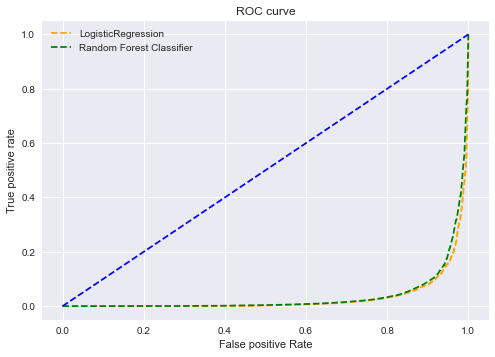

In [78]:

#LogisticRegression vs rfr
from sklearn.metrics import roc_curve
model1 = LogisticRegression()
# Support vector machine
model2 =RandomForestClassifier()


# fit model
model1.fit(x_train_tfv, y_train)
model2.fit(x_train_tfv, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test_tfv)
pred_prob2 = model2.predict_proba(x_test_tfv)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

As apparent, Logistic Regression has a slightly better performance in identifying the malignant comments.

In [79]:
y=df_new['highly_malignant']
x=df_new['comment_text']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv=tfv.transform(x_train)
x_test_tfv=tfv.transform(x_test)

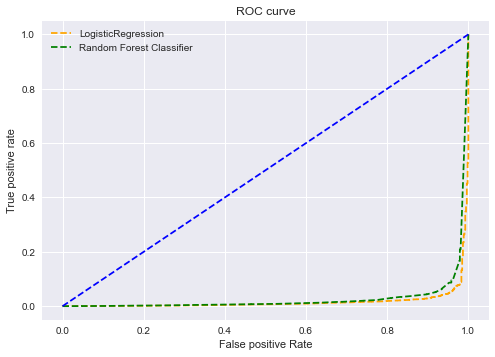

In [80]:
model1 = LogisticRegression()
# Support vector machine
model2 =RandomForestClassifier()


# fit model
model1.fit(x_train_tfv, y_train)
model2.fit(x_train_tfv, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test_tfv)
pred_prob2 = model2.predict_proba(x_test_tfv)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [81]:
#THREAT
y=df_new['threat']
x=df_new['comment_text']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv=tfv.transform(x_train)
x_test_tfv=tfv.transform(x_test)

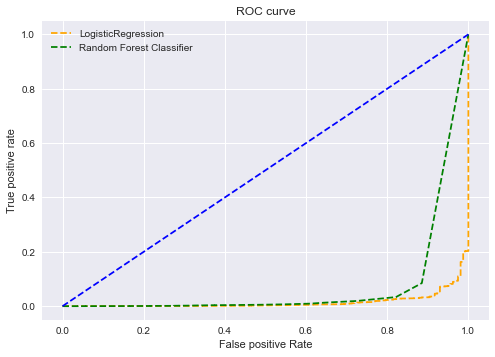

In [82]:
model1 = LogisticRegression()
# Support vector machine
model2 =RandomForestClassifier()


# fit model
model1.fit(x_train_tfv, y_train)
model2.fit(x_train_tfv, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test_tfv)
pred_prob2 = model2.predict_proba(x_test_tfv)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

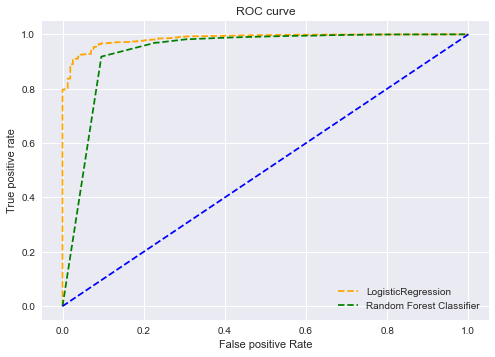

In [83]:
model1 = LogisticRegression()

model2 =RandomForestClassifier()


# fit model
model1.fit(x_train_tfv, y_train)
model2.fit(x_train_tfv, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test_tfv)
pred_prob2 = model2.predict_proba(x_test_tfv)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,0], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,0], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [84]:
#Abuse
y=df_new['abuse']
x=df_new['comment_text']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv=tfv.transform(x_train)
x_test_tfv=tfv.transform(x_test)

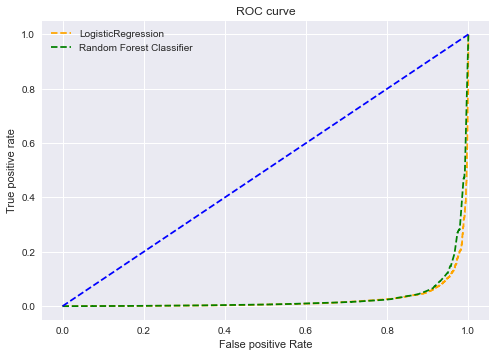

In [85]:
model1 = LogisticRegression()
# Support vector machine
model2 =RandomForestClassifier()


# fit model
model1.fit(x_train_tfv, y_train)
model2.fit(x_train_tfv, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test_tfv)
pred_prob2 = model2.predict_proba(x_test_tfv)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [86]:
y=df_new['loathe']
x=df_new['comment_text']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv=tfv.transform(x_train)
x_test_tfv=tfv.transform(x_test)

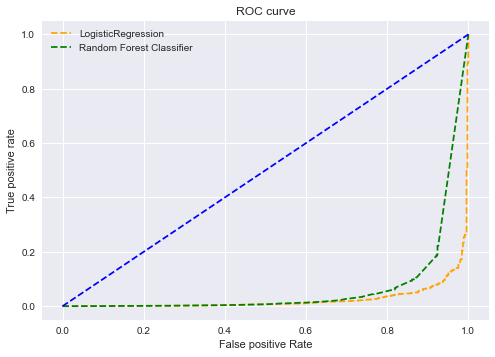

In [87]:
model1 = LogisticRegression()

model2 =RandomForestClassifier()


# fit model
model1.fit(x_train_tfv, y_train)
model2.fit(x_train_tfv, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test_tfv)
pred_prob2 = model2.predict_proba(x_test_tfv)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=0)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=0)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=0)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False positive Rate')
# y label
plt.ylabel('True positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

LogisticRegression did a better job in identifying the 0 and 1 categories across all the target variables.
All the dataframes created after balancing the different target features were then merged into one to proceed for model traing/MachineLearning phase.

In [88]:
balanced_dataset=pd.concat([balanced_mal,balanced_hmal,bal_rude,bal_threat,bal_abuse,bal_loathe],axis=0)
balanced_dataset

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1.0,1.0,1.0,0.0,1.0,0.0
12,0005c987bdfc9d4b,hey what is it talk what is it an exclusive...,1.0,0.0,0.0,0.0,0.0,0.0
16,0007e25b2121310b,bye dont look come or think of comming back to...,1.0,0.0,0.0,0.0,0.0,0.0
42,001810bf8c45bf5f,you are gay or antisemmitian archangel white t...,1.0,0.0,1.0,0.0,1.0,1.0
43,00190820581d90ce,fuck your filthy mother in the ass dry,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2826,079b036fed8995db,you know for human excrement youre pretty fast...,1.0,0.0,0.0,0.0,1.0,0.0
2827,079bf93384771454,i appreciate the sentiment its nice to know t...,0.0,0.0,0.0,0.0,0.0,0.0
2828,079c08cf3721f35e,to tha undertaker if you want to promote your...,0.0,0.0,0.0,0.0,0.0,0.0
2829,079eaf68ae081d68,so you speak for the people of ireland dont ma...,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
#Malignant
x=balanced_dataset['comment_text']
cross=tfv.transform(x)
y=balanced_dataset['malignant']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)
lr1=LogisticRegression()
#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv1=tfv.transform(x_train)
x_test_tfv1=tfv.transform(x_test)
lr1.fit(x_train_tfv1,y_train)
pred_log=lr1.predict(x_test_tfv1)
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

0.9329965336676747
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     15279
         1.0       0.96      0.89      0.92     11839

    accuracy                           0.93     27118
   macro avg       0.94      0.93      0.93     27118
weighted avg       0.93      0.93      0.93     27118



In [91]:
#threat
lr2=LogisticRegression()
x=bal_threat['comment_text']
cross=tfv.transform(x)
y=bal_threat['threat']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv2=tfv.transform(x_train)
x_test_tfv2=tfv.transform(x_test)
lr2.fit(x_train_tfv2,y_train)
pred_log=lr2.predict(x_test_tfv2)
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

0.8504098360655737
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       331
         1.0       0.99      0.54      0.70       157

    accuracy                           0.85       488
   macro avg       0.90      0.77      0.80       488
weighted avg       0.87      0.85      0.84       488



In [92]:
#abuse
lr3=LogisticRegression()
x=bal_abuse['comment_text']
cross=tfv.transform(x)
y=bal_abuse['abuse']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv3=tfv.transform(x_train)
x_test_tfv3=tfv.transform(x_test)
lr3.fit(x_train_tfv3,y_train)
pred_log=lr3.predict(x_test_tfv3)
print("accuracy:",accuracy_score(y_test,pred_log))
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy: 0.9017088356073653
0.9017088356073653
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      4966
         1.0       0.94      0.76      0.84      2583

    accuracy                           0.90      7549
   macro avg       0.91      0.87      0.88      7549
weighted avg       0.91      0.90      0.90      7549



In [93]:
#loathe
lr4=LogisticRegression()
x=bal_loathe['comment_text']
cross=tfv.transform(x)
y=bal_loathe['loathe']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.44, random_state=42)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv4=tfv.transform(x_train)
x_test_tfv4=tfv.transform(x_test)
lr4.fit(x_train_tfv4,y_train)
pred_log=lr4.predict(x_test_tfv4)
print("accuracy:",accuracy_score(y_test,pred_log))
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy: 0.8589951377633711
0.8589951377633711
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90      1231
         1.0       0.93      0.63      0.75       620

    accuracy                           0.86      1851
   macro avg       0.88      0.80      0.83      1851
weighted avg       0.87      0.86      0.85      1851



In [94]:
#highly malignant
lr5=LogisticRegression()
x=balanced_hmal['comment_text']
cross=tfv.transform(x)
y=balanced_hmal['highly_malignant']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.55, random_state=52)

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
x_train_tfv5=tfv.transform(x_train)
x_test_tfv5=tfv.transform(x_test)
lr5.fit(x_train_tfv5,y_train)
pred_log=lr5.predict(x_test_tfv5)
print("accuracy:",accuracy_score(y_test,pred_log))
print(accuracy_score(y_test,pred_log))
print(classification_report(y_test,pred_log))

accuracy: 0.886822318955283
0.886822318955283
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92      1625
         1.0       0.95      0.72      0.82       902

    accuracy                           0.89      2527
   macro avg       0.91      0.85      0.87      2527
weighted avg       0.89      0.89      0.88      2527



Logistic Regression was selected as our best model as it had a good f1_score,took least time among all to process/predict the target columns and also had a very low difference between accuracy and cross_val_score.

Different LogisticRegression algorithms were used for predicting the different target variables.

Saving the models using pickle

Loading the model back for predicting the test data

In [95]:
df_test=pd.read_csv('malignant_comments_classifier(test).csv',sep='\t')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [96]:
df_test.drop('id',axis=1,inplace=True)

Performing the same type of data cleaning/preprocessing  operations on the test data as was done on the training data.

In [97]:
#Cleaning the text data
df_test['comment_text']=df_test['comment_text'].astype(str)
alpha=lambda x:re.sub(r"\[[0-9]*\]",' ',x)
alpha2=lambda x:re.sub(r'\s+',' ',x)
alpha3=lambda x:x.lower()
alpha4=lambda x:re.sub(r'\d',' ',x)
alpha5=lambda x:re.sub(r'\s+'," ",x)
alpha6=lambda x:x.translate(str.maketrans("","",string.punctuation))
df_test['comment_text']=df_test['comment_text'].map(alpha).map(alpha2).map(alpha3).map(alpha4).map(alpha5).map(alpha6)

In [98]:

#tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
test_data=tfv.transform(df_test['comment_text'])
test_data

<153186x177192 sparse matrix of type '<class 'numpy.float64'>'
	with 3193177 stored elements in Compressed Sparse Row format>

SAVING THE LOGISTIC REGRESSION MODEL FOR FUTURE USE

In [99]:
import pickle
filename1='malignant_comments_classifier.sav'
pickle.dump(lr1,open(filename1,'wb'))

#for highly malignant comments

In [100]:
filename2='highly_malignant_comments_classifier.sav'
pickle.dump(lr5,open(filename2,'wb'))

FOR ABUSE TYPE COMMENTS

In [101]:
filename3='abuse_comments_classifier.sav'
pickle.dump(lr3,open(filename3,'wb'))

FOR COMMENTS POSING THREAT

In [102]:
filename4='threatning_comments_classifier.sav'
pickle.dump(lr2,open(filename4,'wb'))

FOR LOATHE TYPE OF COMMENTS

In [106]:
filename5='loathe_comments_classifier.sav'
pickle.dump(lr4,open(filename5,'wb'))

RELOADING THE MODELS FOR MAKING PREDICTIONS ON THE TEST DATA

In [107]:
load_model1=pickle.load(open(filename1,'rb'))

In [108]:
predictions1=load_model1.predict_proba(test_data)
predictions1

array([[0.00780046, 0.99219954],
       [0.95746892, 0.04253108],
       [0.7954962 , 0.2045038 ],
       ...,
       [0.92062706, 0.07937294],
       [0.83095471, 0.16904529],
       [0.01988635, 0.98011365]])

In [109]:
#for highly malignant
load_model2=pickle.load(open(filename2,'rb'))

In [110]:
predictions2=load_model2.predict_proba(test_data)
predictions2

array([[0.41687805, 0.58312195],
       [0.8550075 , 0.1449925 ],
       [0.84054752, 0.15945248],
       ...,
       [0.85426016, 0.14573984],
       [0.85416544, 0.14583456],
       [0.84898844, 0.15101156]])

In [111]:
#for abusive comments
load_model3=pickle.load(open(filename3,'rb'))

In [112]:
predictions3=load_model3.predict_proba(test_data)
predictions3

array([[0.07132553, 0.92867447],
       [0.93588115, 0.06411885],
       [0.82216382, 0.17783618],
       ...,
       [0.8930715 , 0.1069285 ],
       [0.86296418, 0.13703582],
       [0.40826907, 0.59173093]])

In [113]:
#for threatning comments
load_model4=pickle.load(open(filename4,'rb'))

In [114]:
predictions4=load_model4.predict_proba(test_data)
predictions4

array([[0.57496443, 0.42503557],
       [0.79104076, 0.20895924],
       [0.79850769, 0.20149231],
       ...,
       [0.81666927, 0.18333073],
       [0.78589034, 0.21410966],
       [0.73771569, 0.26228431]])

In [115]:
#for loathe type of comments
load_model5=pickle.load(open(filename5,'rb'))

In [116]:
predictions5=load_model5.predict_proba(test_data)
predictions5

array([[0.34910799, 0.65089201],
       [0.80409763, 0.19590237],
       [0.79000701, 0.20999299],
       ...,
       [0.82066256, 0.17933744],
       [0.65849186, 0.34150814],
       [0.70003276, 0.29996724]])

CALCULATING PROBABILITY OF EACH OF THE COMMENTS FALLING UNDER DIFFERENT CATEGORIES.

In [117]:
#for i in range(len(df_test)):
 #   print("The comment",df_test['comment_text'][i],"is")
  #  print(predictions1[:,1][i],'% malignant')
   # print(predictions2[:,1][i],'% highly_malignant')
    #print(predictions3[:,1][i],'% abuse')
    #print(predictions4[:,1][i],'% threat')
    #print(predictions5[:,1][i],'% loathe')

CREATING A DATAFRAME FOR THE TEST DATA AND ITS PREDICTIONS

In [124]:
text=list(df_test['comment_text'])
malignant=list(predictions1[:,1])
h_malignant=list(predictions2[:,1])
abuse=list(predictions3[:,1])
threat=list(predictions4[:,1])
loathe=list(predictions5[:,1])

In [125]:
DICTIONARY={'comment_text':text,'malignant(in%)':malignant,'highly_malignant(in%)':h_malignant,'abuse(in%)':abuse,'threat(in%)':threat,'loathe(in%)':loathe}

The test dataset with the comment text along with the respective probabilities of the comment falling under different categories.

In [136]:
test_result=pd.DataFrame(data=DICTIONARY)
test_result

,comment_text,malignant(in%),highly_malignant(in%),abuse(in%),threat(in%),loathe(in%)
0,yo bitch ja rule is more succesful then youll ...,0.992200,0.583122,0.928674,0.425036,0.650892
1,from rfc the title is fine as it is imo,0.042531,0.144992,0.064119,0.208959,0.195902
2,sources zawe ashton on lapland â€”,0.204504,0.159452,0.177836,0.201492,0.209993
3,if you have a look back at the source the info...,0.014337,0.096200,0.043059,0.137537,0.091069
4,i dont anonymously edit articles at all,0.185289,0.120018,0.121948,0.180957,0.153326
...,...,...,...,...,...,...
153181,i totally agree this stuff is nothing but too...,0.141984,0.138984,0.077854,0.189766,0.172215
153182,throw from out field to home plate does it g...,0.293630,0.162098,0.249881,0.231052,0.252765
153183,okinotorishima categories i see your change...,0.079373,0.145740,0.106928,0.183331,0.179337
153184,one of the founding nations of the eu germa...,0.169045,0.145835,0.137036,0.214110,0.341508


STORING PREDICTIONS(in terms of probability) MADE ON TEST DATA IN A CSV FILE.

In [140]:
test_result.to_csv('comments_classifier(predicted)')

END OF WORKSHEET